# EDA 연령·체중·수면·생활습관에 따른 주요 질병 발생 비율분석

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\HANYGO230.ttf' # 윈도우 OS 폰트 경로
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name() # 폰트명
matplotlib.rc('font', family=font_name)
# matplotlib이 기본적으로 사용하는 유니코드 마이너스 비활성화
# -> 아스키코드의 마이너스 사용
plt.rc('axes', unicode_minus=False)

## 01. 데이터 수집 및 로드

In [74]:
df = pd.read_csv("data/heart_2022_with_nans.csv")

df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


## 02. 데이터구조 및 변수 이해

In [79]:
print(df.shape)

print('*'  * 100)

print(df.columns)

print('*'  * 100)

print(df.dtypes)

print('*'  * 100)

df.info()

(445132, 40)
****************************************************************************************************
Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')
***********************************************************************

## 03. 데이터요약 및 기술통계

In [76]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [78]:
df.describe(include='object').T

,count,unique,top,freq
State,445132,54,Washington,26152
Sex,445132,2,Female,235893
GeneralHealth,443934,5,Very good,148444
LastCheckupTime,436824,4,Within past year (anytime less than 12 months ...,350944
PhysicalActivities,444039,2,Yes,337559
RemovedTeeth,433772,4,None of them,233455
HadHeartAttack,442067,2,No,416959
HadAngina,440727,2,No,414176
HadStroke,443575,2,No,424336
HadAsthma,443359,2,No,376665


In [82]:
print(df.value_counts())
print('*'  * 100)
print(df['Sex'].value_counts())
print('*'  * 100)
print(df['AgeCategory'].value_counts())


State         Sex     GeneralHealth  PhysicalHealthDays  MentalHealthDays  LastCheckupTime                                         PhysicalActivities  SleepHours  RemovedTeeth            HadHeartAttack  HadAngina  HadStroke  HadAsthma  HadSkinCancer  HadCOPD  HadDepressiveDisorder  HadKidneyDisease  HadArthritis  HadDiabetes  DeafOrHardOfHearing  BlindOrVisionDifficulty  DifficultyConcentrating  DifficultyWalking  DifficultyDressingBathing  DifficultyErrands  SmokerStatus   ECigaretteUsage                            ChestScan  RaceEthnicityCategory     AgeCategory   HeightInMeters  WeightInKilograms  BMI    AlcoholDrinkers  HIVTesting  FluVaxLast12  PneumoVaxEver  TetanusLast10Tdap                                          HighRiskLastYear  CovidPos
Maryland      Female  Good           0.0                 0.0               Within past year (anytime less than 12 months ago)      Yes                 8.0         None of them            No              No         No         Yes        No   

## 04. 결측치, 이상치

In [83]:
df.isna().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

<Axes: >

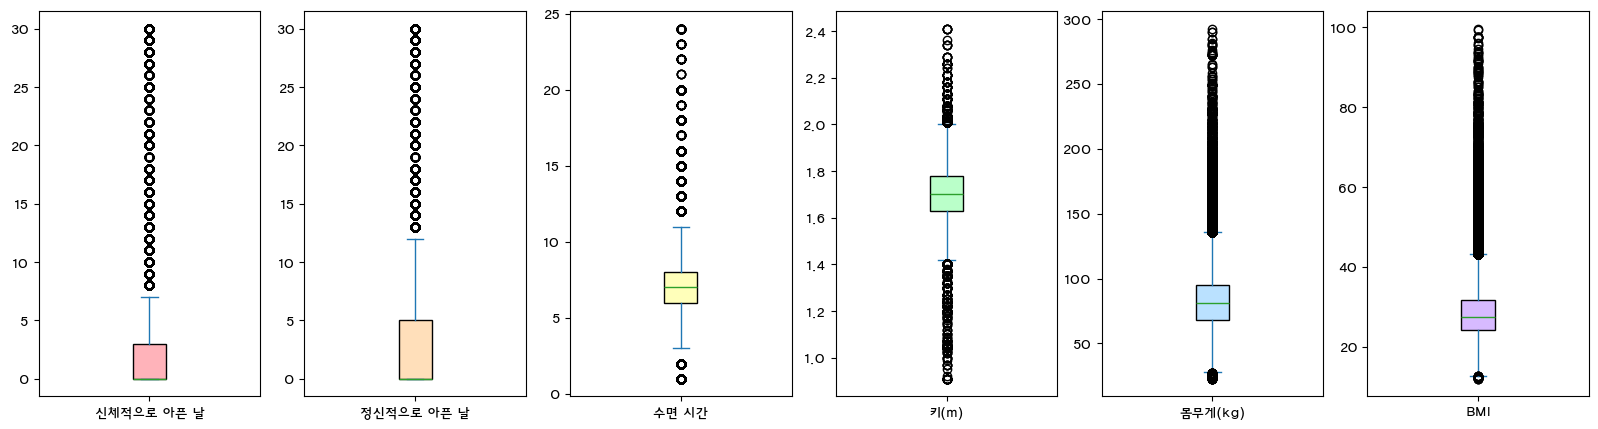

In [85]:
# 이상치 확인

fig, ax = plt.subplots(1, 6, figsize=(20,5))
df['PhysicalHealthDays'].rename('신체적으로 아픈 날').plot(kind='box', ax=ax[0],  patch_artist=True, boxprops=dict(facecolor='#FFB3BA'))
df['MentalHealthDays'].rename('정신적으로 아픈 날').plot(kind='box', ax=ax[1],  patch_artist=True, boxprops=dict(facecolor='#FFDFBA'))
df['SleepHours'].rename('수면 시간').plot(kind='box', ax=ax[2],  patch_artist=True, boxprops=dict(facecolor='#FFFFBA'))
df['HeightInMeters'].rename('키(m)').plot(kind='box', ax=ax[3],  patch_artist=True, boxprops=dict(facecolor='#BAFFC9'))
df['WeightInKilograms'].rename('몸무게(kg)').plot(kind='box', ax=ax[4],  patch_artist=True, boxprops=dict(facecolor='#BAE1FF'))
df['BMI'].plot(kind='box', ax=ax[5],  patch_artist=True, boxprops=dict(facecolor='#D7BAFF'))


## 05. 데이터 전처리
- 결측치/중복값/이상치 처리
- 불필요한 컬럼 제거

In [86]:
# 결측치 처리
df = df.dropna(how='any')

## 06. Feature Engineering
- 새로운 변수 생성, 그룹화, 로그변환, 스케일링 등

In [88]:
female_df = df[df['Sex'] == 'Female']
male_df = df[df['Sex'] == 'Male']
df.loc[:,'HeartDisease'] = (df['HadHeartAttack'] == 'Yes') | (df['HadAngina'] == 'Yes')
df.loc[:,'HeartDisease'] = df['HeartDisease'].map({True: 'Yes', False: 'No'})
df.loc[:,'HeartDisease_num'] = df['HeartDisease'].map({'Yes':1, 'No':0})


df.loc[:,'SmokerStatus'] = df['SmokerStatus'].replace({
    'Never smoked': '비흡연',
    'Former smoker': '과거흡연',
    'Current smoker - now smokes some days': '가끔흡연',
    'Current smoker - now smokes every day': '매일흡연'
})

order = ['Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59', 'Age 60 to 64', 'Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older']

df['SmokerStatus']
df['ECigaretteUsage'].unique()

df.loc[:,'ECigaretteUsage'] = df['ECigaretteUsage'].replace({
    'Never used e-cigarettes in my entire life': '비흡연',
    'Not at all (right now)': '과거흡연',
    'Use them some days': '가끔흡연',
    'Use them every day': '매일흡연'
})
df['ECigaretteUsage'].unique()

df.loc[:, 'CovidPos'] = df['CovidPos'].replace({
    'Tested positive using home test without a health professional': 'Yes'
})

df.loc[:, 'HadDiabetes'] = df['HadDiabetes'].replace({
    'Yes, but only during pregnancy (female)': 'No',
    'No, pre-diabetes or borderline diabetes': '당뇨 직전'
})


## 07. 변수분포 시각화

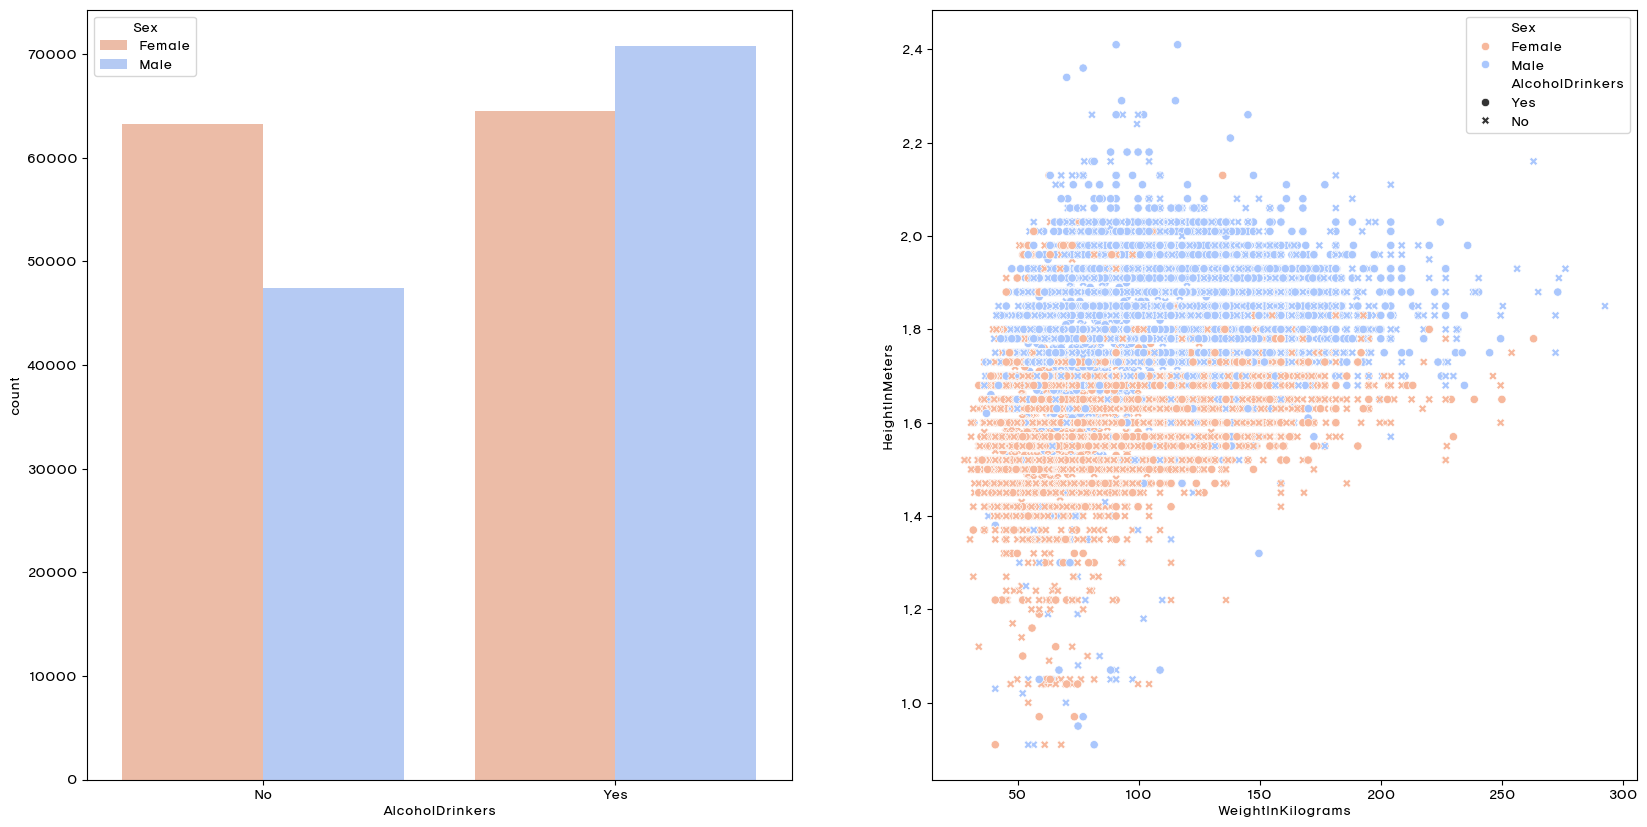

In [91]:
# 키/몸무게 성별 음주 분포

fig, ax = plt.subplots(
    1,2, figsize=(20,10)
)

sns.countplot(
    data=df,
    x='AlcoholDrinkers',
    palette='coolwarm_r',
    hue='Sex',
    ax=ax[0]
)


sns.scatterplot(
    data=df,
    x='WeightInKilograms',
    y='HeightInMeters',
    hue='Sex',
    palette='coolwarm_r',
    style='AlcoholDrinkers', 
    style_order=['Yes', 'No'],
    ax=ax[1]
)

plt.show()

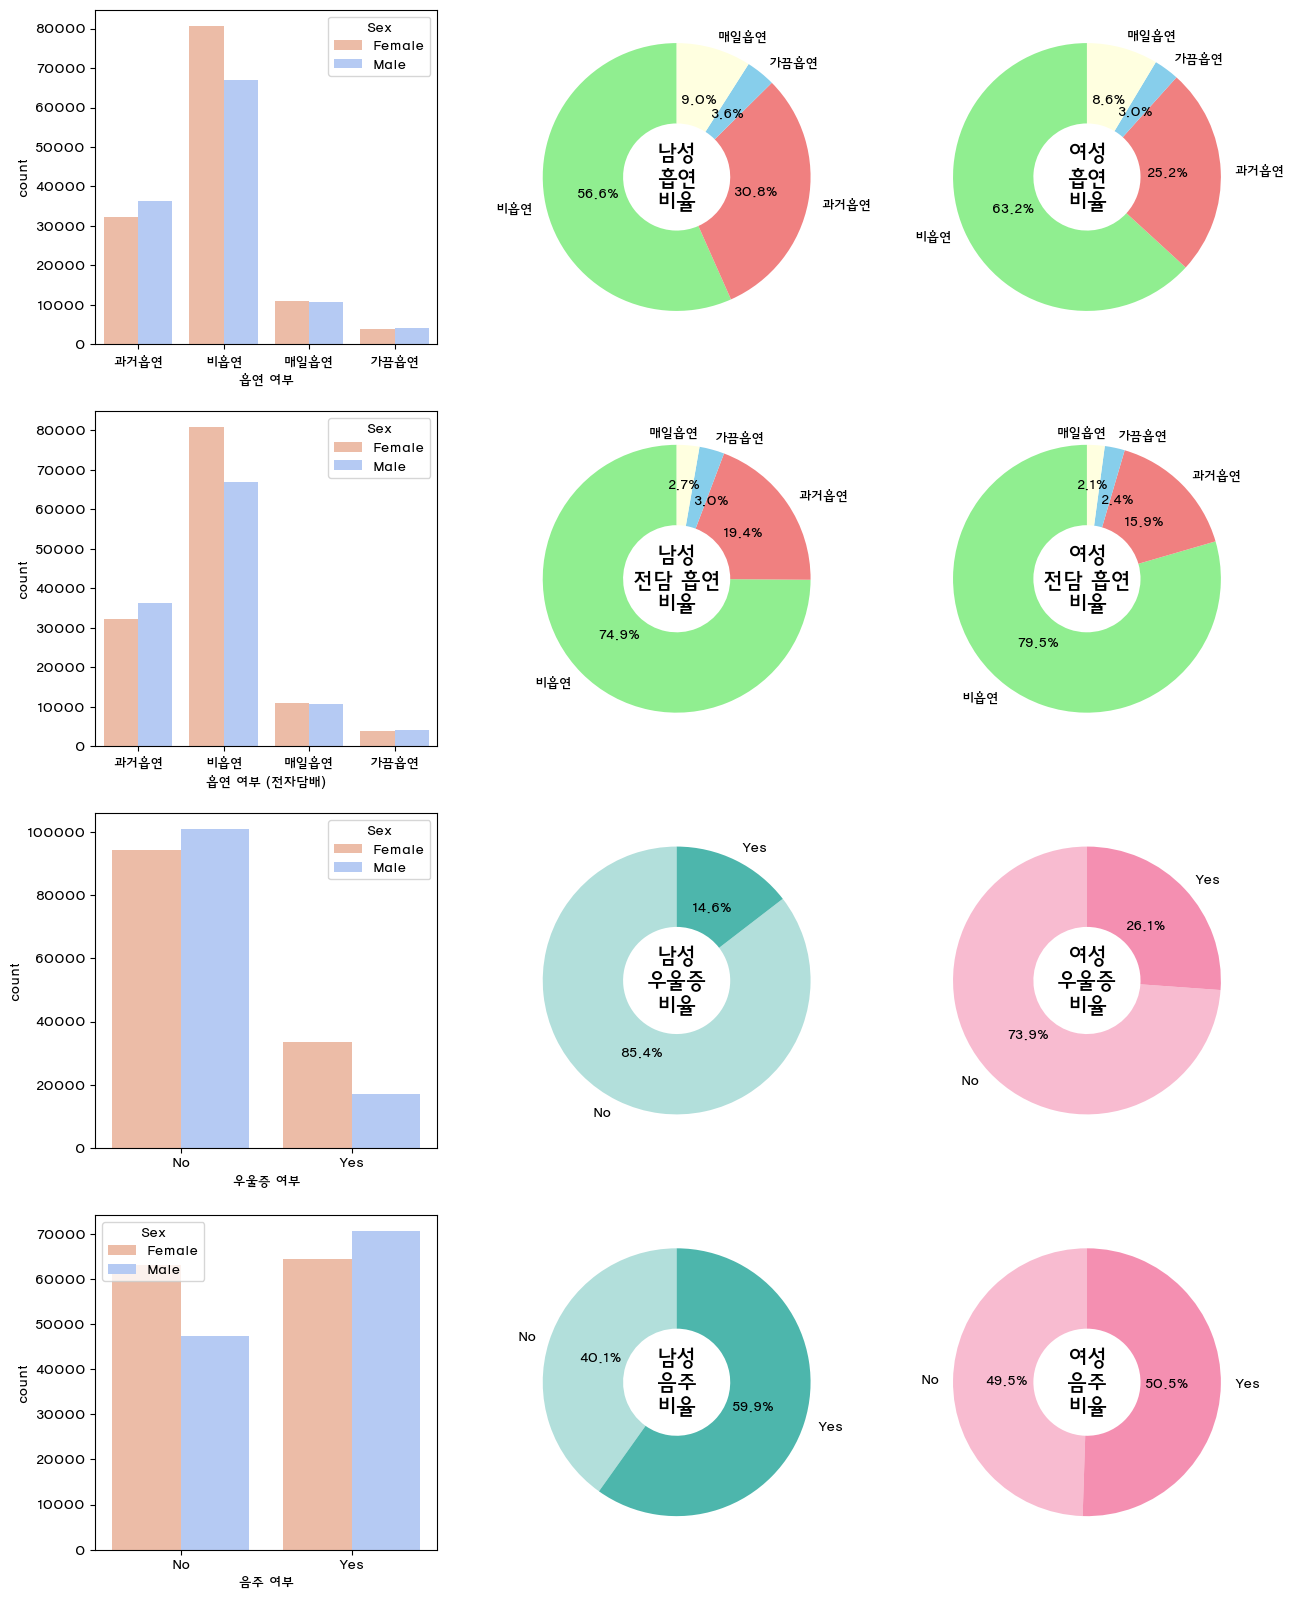

In [166]:
# 남/여 간단

fig, ax = plt.subplots(4, 3, figsize=(15,20))

smoke_order = ['비흡연', '과거흡연', '가끔흡연', '매일흡연']

sns.countplot(data=df, x='SmokerStatus', palette='coolwarm_r', hue='Sex', ax=ax[0,0]).set_xlabel("흡연 여부")

smoke_male = male_df['SmokerStatus'].value_counts(normalize=True).reindex(smoke_order)
ax[0,1].pie(smoke_male, labels=smoke_male.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen','lightcoral','skyblue','lightyellow'], wedgeprops={'width' : 0.6})
ax[0,1].text(0,0, '남성\n흡연\n비율', ha='center', va='center', fontsize=16)

smoke_female = female_df['SmokerStatus'].value_counts(normalize=True).reindex(smoke_order)
ax[0,2].pie(smoke_female, labels=smoke_female.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen','lightcoral','skyblue','lightyellow'], wedgeprops={'width' : 0.6})
ax[0,2].text(0,0, '여성\n흡연\n비율', ha='center', va='center', fontsize=16)



sns.countplot(data=df, x='SmokerStatus', palette='coolwarm_r', hue='Sex', ax=ax[1,0]).set_xlabel("흡연 여부 (전자담배)")

ec_male = male_df['ECigaretteUsage'].value_counts(normalize=True).reindex(smoke_order)
_, texts, autotexts  = ax[1,1].pie(
    ec_male, labels=ec_male.index, autopct='%1.1f%%', startangle=90, labeldistance=1.1,
    colors=['lightgreen','lightcoral','skyblue','lightyellow'], wedgeprops={'width' : 0.6})
for t, at in zip(texts, autotexts):
    if t.get_text() == '매일흡연':
        x, y = t.get_position()
        t.set_position((x - 0.3, y))
        x, y = at.get_position()
        at.set_position((x, y + 0.1))
    if t.get_text() == '가끔흡연':
        x, y = at.get_position()
        at.set_position((x + 0.1, y))        
ax[1,1].text(0,0, '남성\n전담 흡연\n비율', ha='center', va='center', fontsize=16)

ec_female = female_df['ECigaretteUsage'].value_counts(normalize=True).reindex(smoke_order)
_, texts, autotexts  = ax[1,2].pie(
    ec_female, labels=ec_female.index, autopct='%1.1f%%', startangle=90, labeldistance=1.1,
    colors=['lightgreen','lightcoral','skyblue','lightyellow'], wedgeprops={'width' : 0.6})
for t, at in zip(texts, autotexts):
    if t.get_text() == '매일흡연':
        x, y = t.get_position()
        t.set_position((x - 0.3, y))
        x, y = at.get_position()
        at.set_position((x, y + 0.1))
    if t.get_text() == '가끔흡연':
        x, y = at.get_position()
        at.set_position((x + 0.1, y))        
ax[1,2].text(0,0, '여성\n전담 흡연\n비율', ha='center', va='center', fontsize=16)



sns.countplot(data=df, x='HadDepressiveDisorder', palette='coolwarm_r', hue='Sex', ax=ax[2,0]).set_xlabel("우울증 여부")

sleep_male = male_df['HadDepressiveDisorder'].value_counts(normalize=True)
ax[2,1].pie(sleep_male, labels=sleep_male.index, autopct='%1.1f%%', startangle=90, colors = ['#B2DFDB','#4DB6AC'], wedgeprops={'width' : 0.6}, )
ax[2,1].text(0,0, '남성\n우울증\n비율', ha='center', va='center', fontsize=16)

sleep_female = female_df['HadDepressiveDisorder'].value_counts(normalize=True)
ax[2,2].pie(sleep_female, labels=sleep_female.index, autopct='%1.1f%%', startangle=90, colors = ['#F8BBD0','#F48FB1'], wedgeprops={'width' : 0.6}, )
ax[2,2].text(0,0, '여성\n우울증\n비율', ha='center', va='center', fontsize=16)



sns.countplot(data=df, x='AlcoholDrinkers', palette='coolwarm_r', hue='Sex', ax=ax[3,0]).set_xlabel("음주 여부")
drink_male = male_df['AlcoholDrinkers'].value_counts(normalize=True).sort_index()
ax[3,1].pie(drink_male, labels=drink_male.index, autopct='%1.1f%%', startangle=90, colors = ['#B2DFDB','#4DB6AC'], wedgeprops={'width' : 0.6}, )
ax[3,1].text(0,0, '남성\n음주\n비율', ha='center', va='center', fontsize=16)

drink_female = female_df['AlcoholDrinkers'].value_counts(normalize=True).sort_index()
ax[3,2].pie(drink_female, labels=drink_female.index, autopct='%1.1f%%', startangle=90, colors = ['#F8BBD0','#F48FB1'], wedgeprops={'width' : 0.6}, )
ax[3,2].text(0,0, '여성\n음주\n비율', ha='center', va='center', fontsize=16)



plt.show()

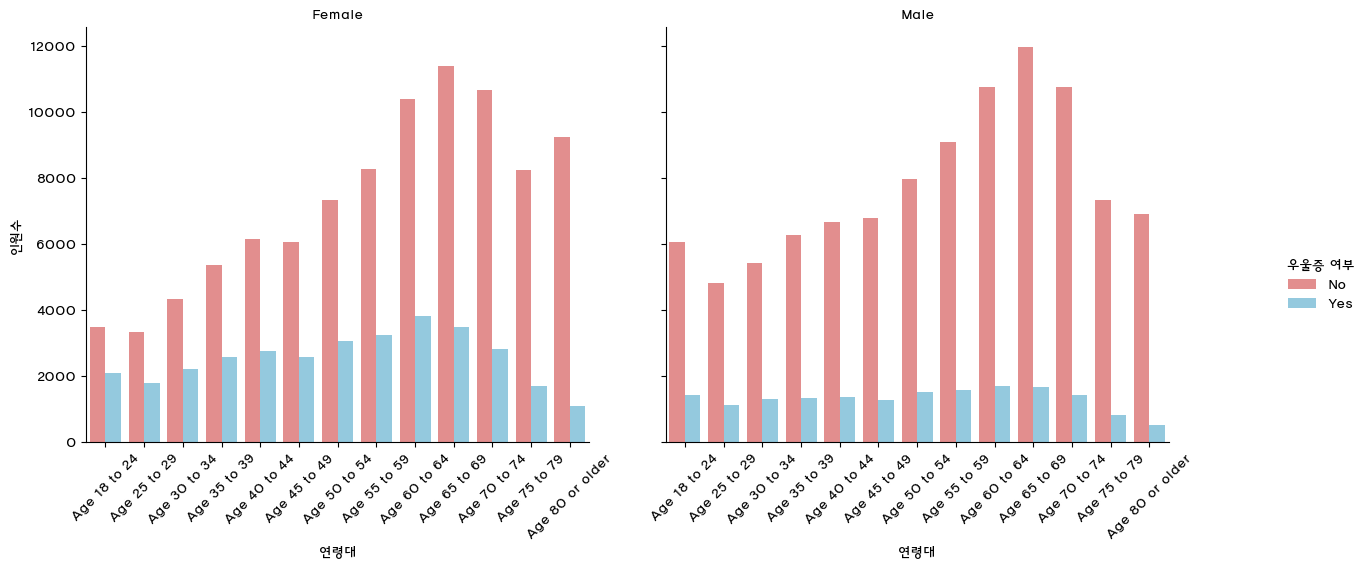

In [143]:
# FacetGrid로 성별에 따라 나누기
g = sns.catplot(
    data=df,
    x='AgeCategory',
    hue='HadDepressiveDisorder',
    col='Sex',
    kind='count',
    order=order,
    palette=['lightcoral','skyblue'],
    height=5,
    aspect=1.2
)

g.set_xticklabels(rotation=45)
g.set_axis_labels("연령대", "인원수")
g.set_titles("{col_name}")
g._legend.set_title("우울증 여부")

plt.show()

## 08. 변수 간 관계 시각화

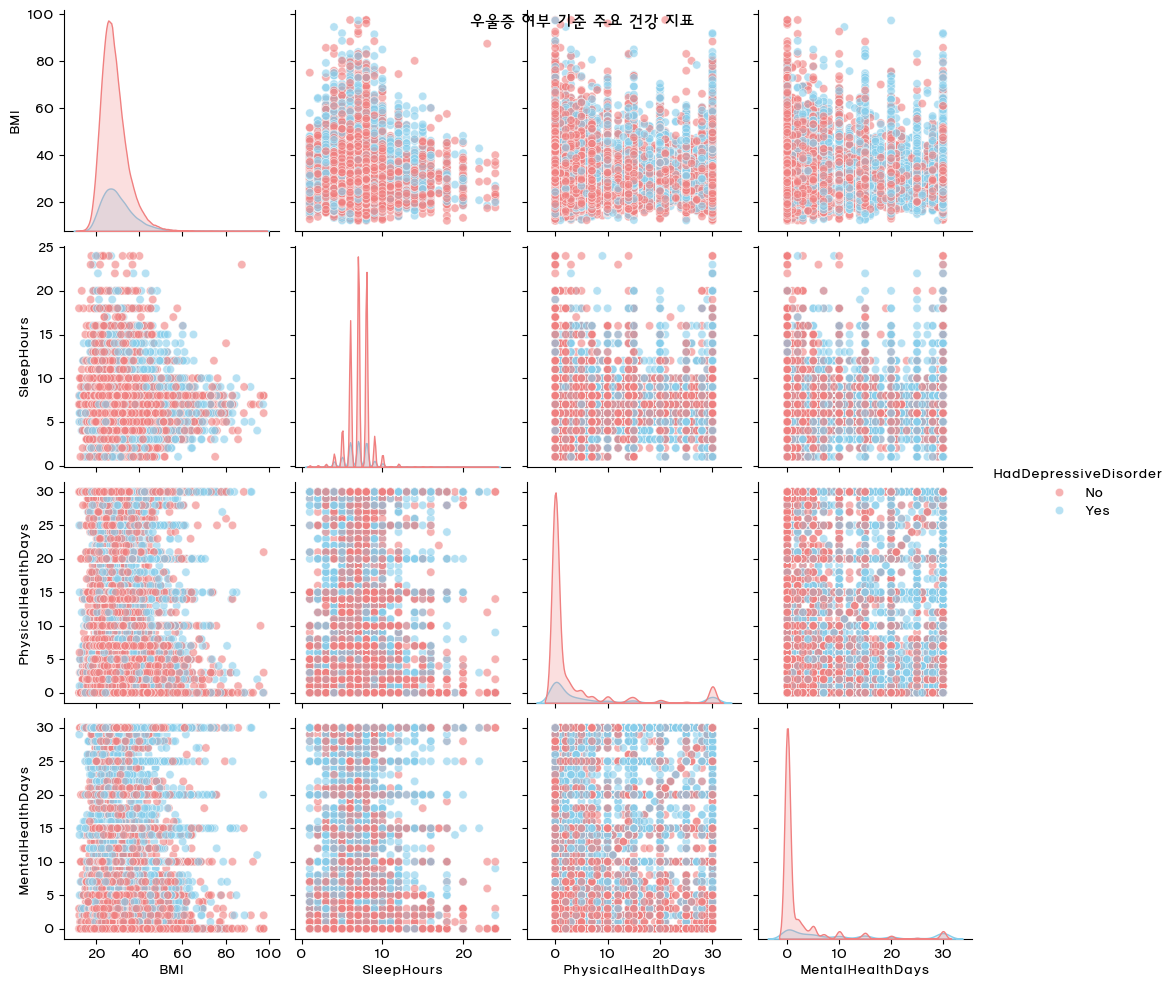

In [144]:
cols = ['BMI', 'SleepHours', 'PhysicalHealthDays', 'MentalHealthDays', 'HadDepressiveDisorder']

sns.pairplot(df[cols], hue='HadDepressiveDisorder', 
    palette={'Yes':'skyblue','No':'lightcoral'}, diag_kind='kde', plot_kws={'alpha':0.6})

plt.suptitle('우울증 여부 기준 주요 건강 지표')
plt.show()

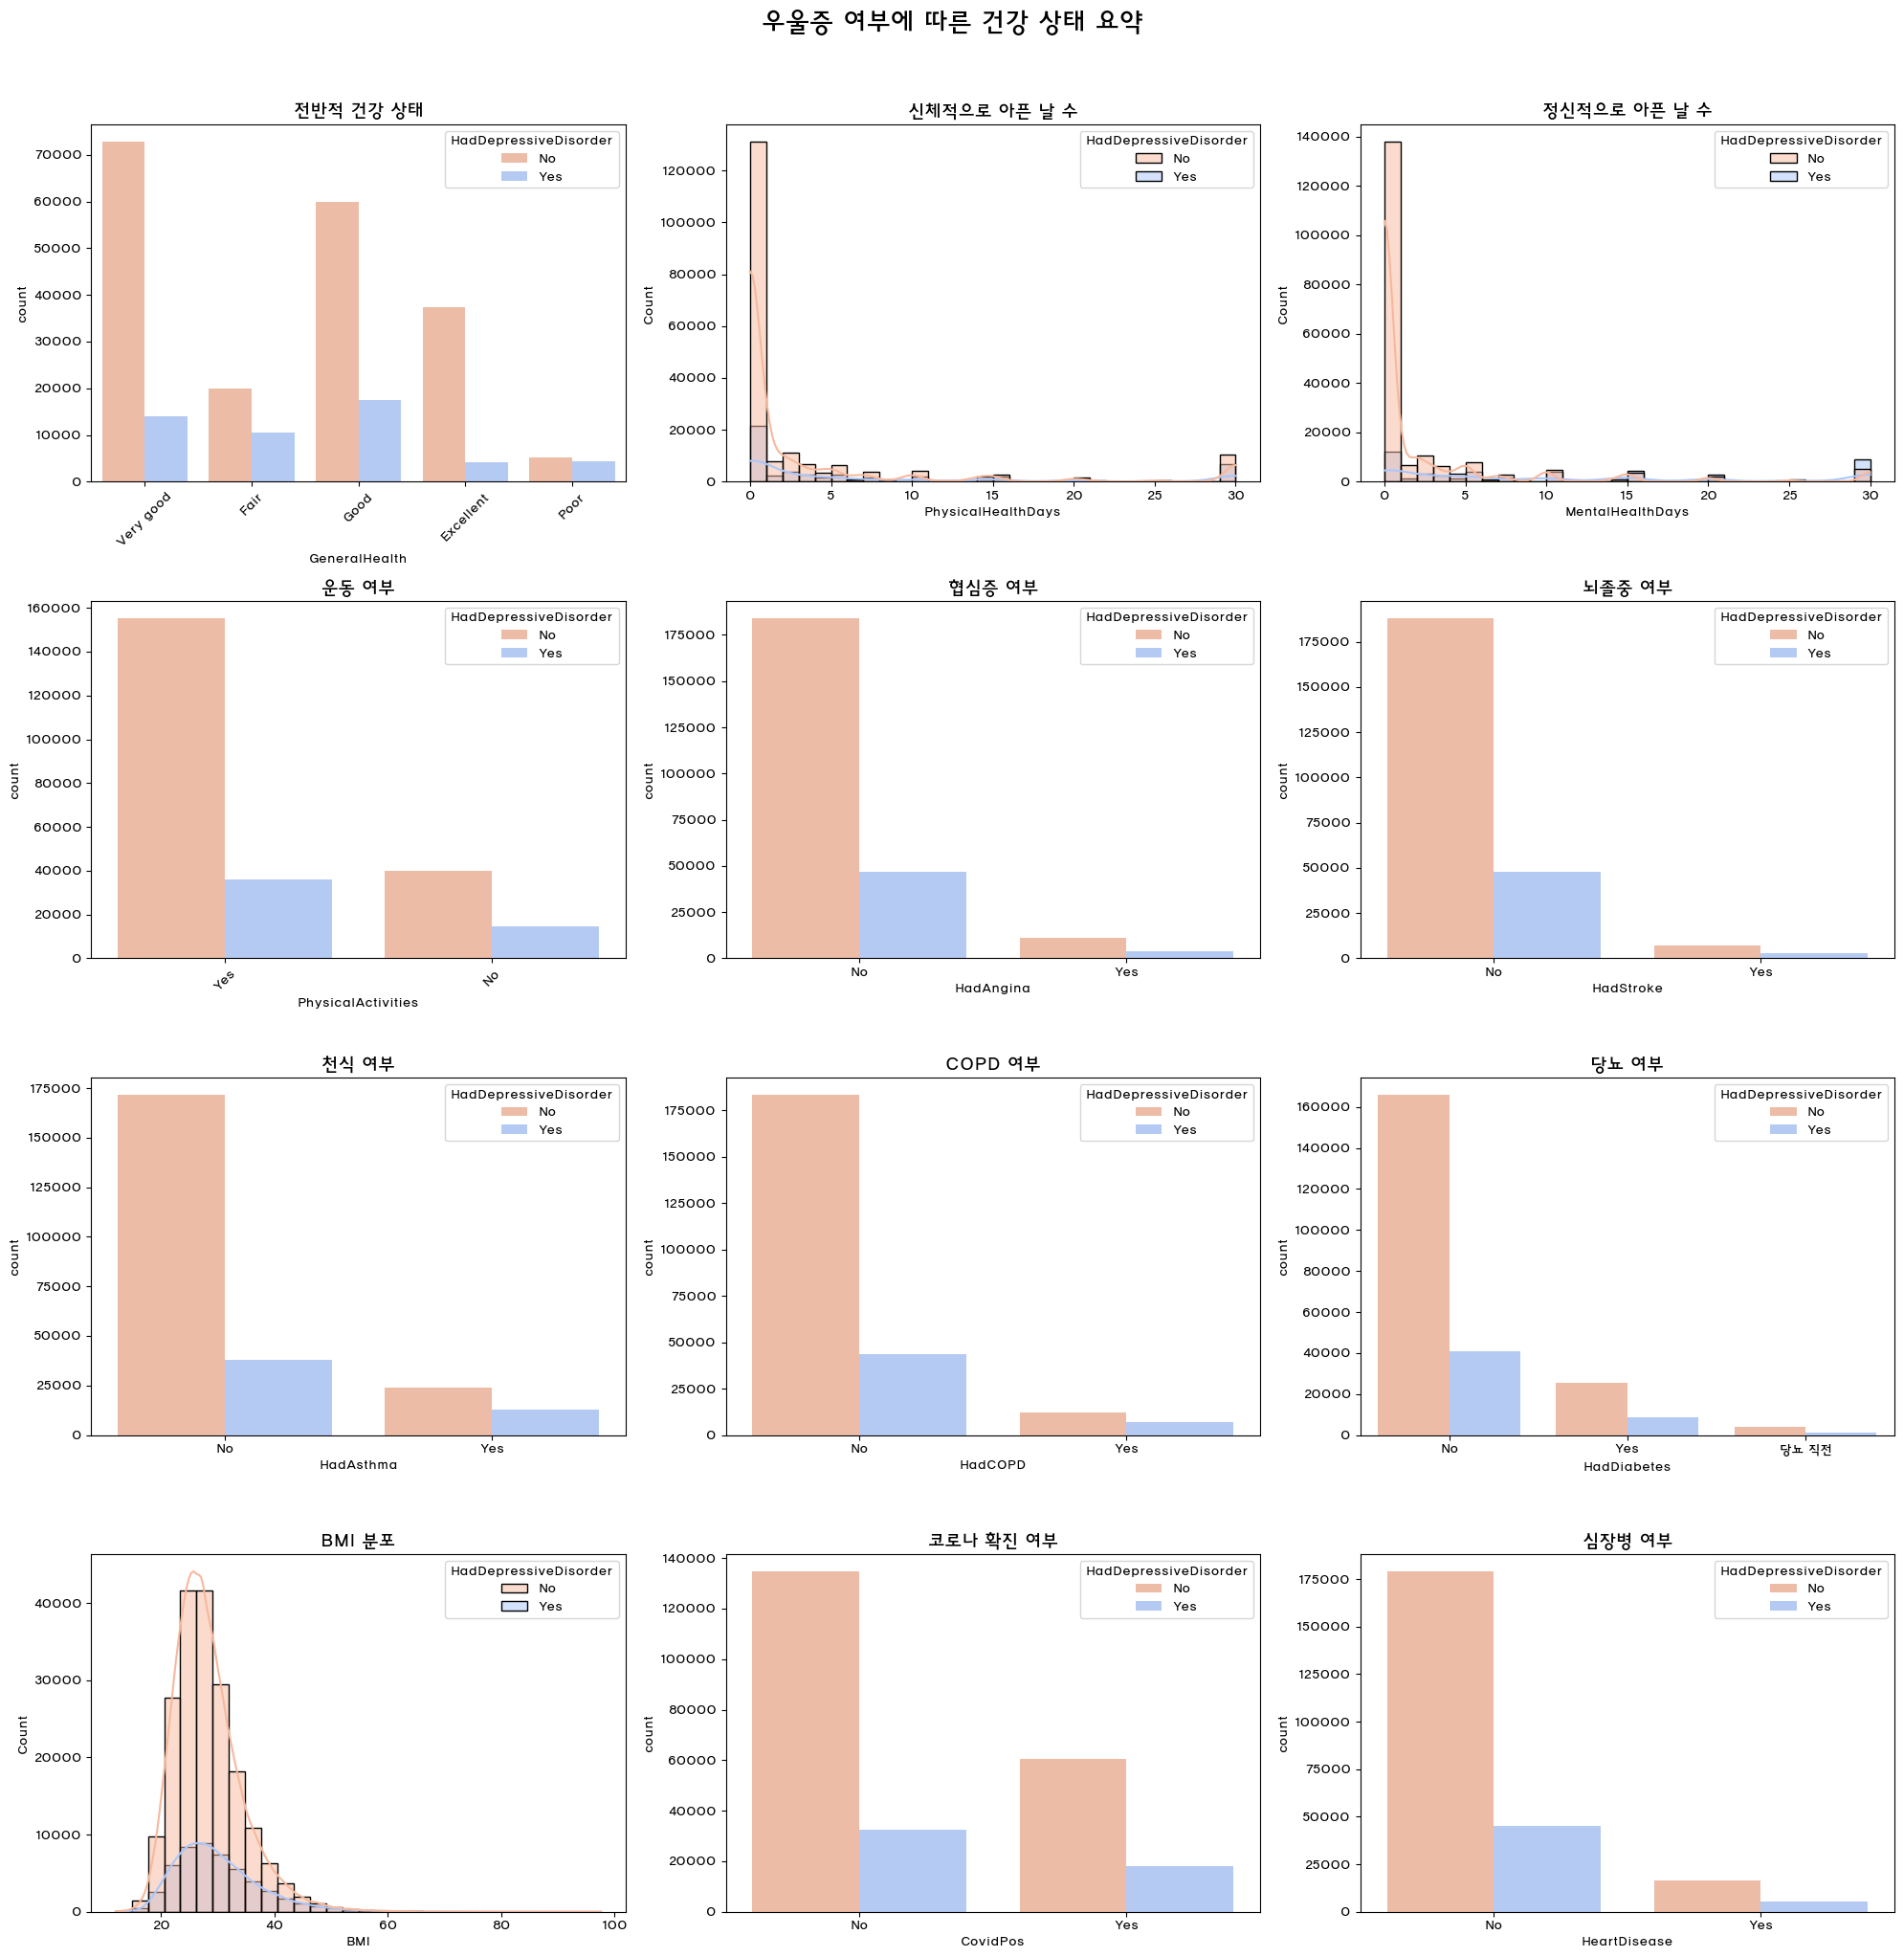

In [148]:
depress_df = df[df['HadDepressiveDisorder'] == 'Yes']

fig, ax = plt.subplots(4, 3, figsize=(20, 20))

# 1행
sns.countplot(data=df, x='GeneralHealth', hue='HadDepressiveDisorder', palette='coolwarm_r', ax=ax[0,0])
ax[0,0].set_title('전반적 건강 상태', fontsize=14)
ax[0,0].tick_params(axis='x', rotation=45)

sns.histplot(data=df, x='PhysicalHealthDays', hue='HadDepressiveDisorder', bins=30, kde=True, palette='coolwarm_r', ax=ax[0,1])
ax[0,1].set_title('신체적으로 아픈 날 수', fontsize=14)

sns.histplot(data=df, x='MentalHealthDays', hue='HadDepressiveDisorder', bins=30, kde=True, palette='coolwarm_r', ax=ax[0,2])
ax[0,2].set_title('정신적으로 아픈 날 수', fontsize=14)

# 2행
sns.countplot(data=df, x='PhysicalActivities', hue='HadDepressiveDisorder', palette='coolwarm_r', ax=ax[1,0])
ax[1,0].set_title('운동 여부', fontsize=14)
ax[1,0].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x='HadAngina', hue='HadDepressiveDisorder', palette='coolwarm_r', ax=ax[1,1])
ax[1,1].set_title('협심증 여부', fontsize=14)

sns.countplot(data=df, x='HadStroke', hue='HadDepressiveDisorder', palette='coolwarm_r', ax=ax[1,2])
ax[1,2].set_title('뇌졸중 여부', fontsize=14)

# 3행
sns.countplot(data=df, x='HadAsthma', hue='HadDepressiveDisorder', palette='coolwarm_r', ax=ax[2,0])
ax[2,0].set_title('천식 여부', fontsize=14)

sns.countplot(data=df, x='HadCOPD', hue='HadDepressiveDisorder', palette='coolwarm_r', ax=ax[2,1])
ax[2,1].set_title('COPD 여부', fontsize=14)

sns.countplot(data=df, x='HadDiabetes', hue='HadDepressiveDisorder', palette='coolwarm_r', ax=ax[2,2])
ax[2,2].set_title('당뇨 여부', fontsize=14)

# 4행
sns.histplot(data=df, x='BMI', hue='HadDepressiveDisorder', bins=30, kde=True, palette='coolwarm_r', ax=ax[3,0])
ax[3,0].set_title('BMI 분포', fontsize=14)

sns.countplot(data=df, x='CovidPos', hue='HadDepressiveDisorder', palette='coolwarm_r', ax=ax[3,1])
ax[3,1].set_title('코로나 확진 여부', fontsize=14)

sns.countplot(data=df, x='HeartDisease', hue='HadDepressiveDisorder', palette='coolwarm_r', ax=ax[3,2])
ax[3,2].set_title('심장병 여부', fontsize=14)

# 전체 제목 및 레이아웃 정리
plt.suptitle('우울증 여부에 따른 건강 상태 요약', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

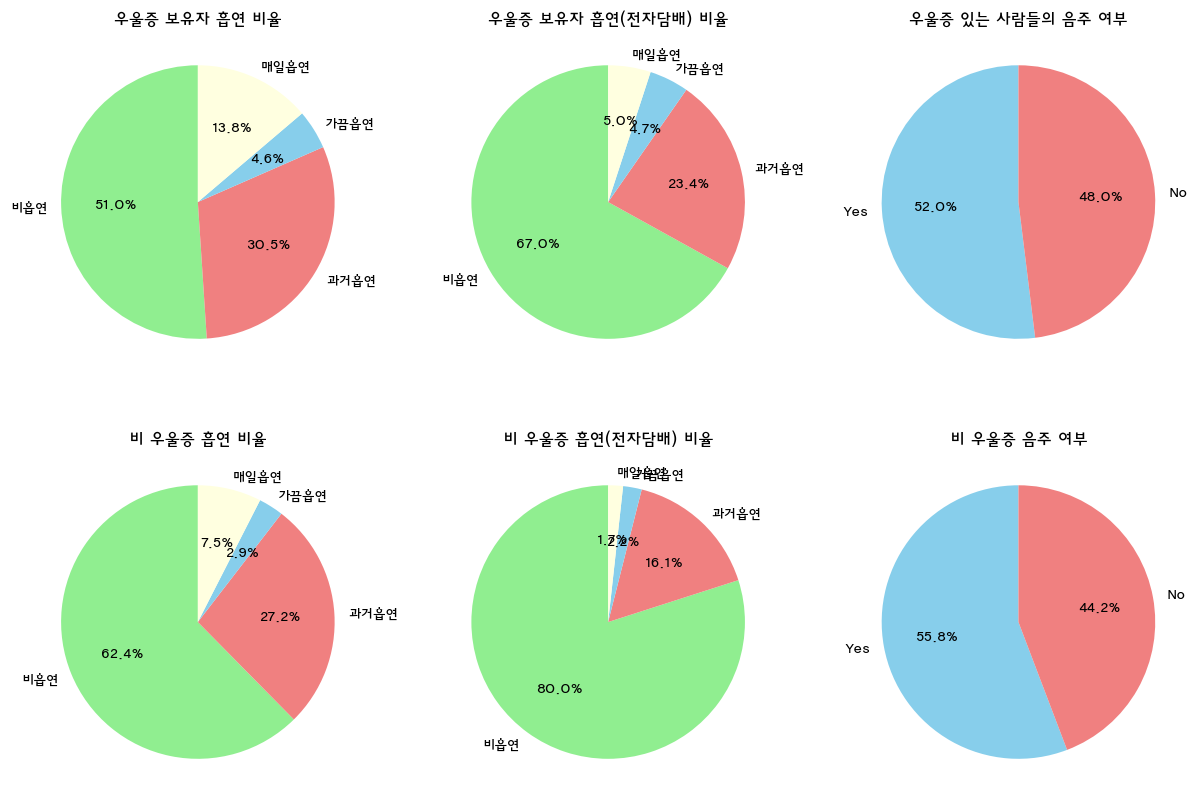

In [177]:
# 우울증이 있는 사람들의 음주/흡연 여부

fig, ax = plt.subplots(2, 3, figsize=(15,10))

depressed_df = df[df['HadDepressiveDisorder'] == 'Yes']

smoke = depressed_df['SmokerStatus'].value_counts(normalize=True)
smoke = smoke.reindex(['비흡연', '과거흡연', '가끔흡연', '매일흡연'])
ax[0,0].pie(
    smoke,
    labels=smoke.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen','lightcoral','skyblue','lightyellow']
)
ax[0,0].set_title('우울증 보유자 흡연 비율')

smoke2 = depressed_df['ECigaretteUsage'].value_counts(normalize=True)
smoke2 = smoke2.reindex(['비흡연', '과거흡연', '가끔흡연', '매일흡연'])
ax[0,1].pie(
    smoke2,
    labels=smoke2.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen','lightcoral','skyblue','lightyellow']
)
ax[0,1].set_title('우울증 보유자 흡연(전자담배) 비율')


alcohol = depressed_df['AlcoholDrinkers'].value_counts(normalize=True)
ax[0,2].pie(
    alcohol,
    labels=alcohol.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue','lightcoral',]
)
ax[0,2].set_title('우울증 있는 사람들의 음주 여부')



depressed_df2 = df[df['HadDepressiveDisorder'] == 'No']

smoke = depressed_df2['SmokerStatus'].value_counts(normalize=True)
smoke = smoke.reindex(['비흡연', '과거흡연', '가끔흡연', '매일흡연'])
ax[1,0].pie(
    smoke,
    labels=smoke.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen','lightcoral','skyblue','lightyellow']
)
ax[1,0].set_title('비 우울증 흡연 비율')

smoke2 = depressed_df2['ECigaretteUsage'].value_counts(normalize=True)
smoke2 = smoke2.reindex(['비흡연', '과거흡연', '가끔흡연', '매일흡연'])
ax[1,1].pie(
    smoke2,
    labels=smoke2.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen','lightcoral','skyblue','lightyellow']
)
ax[1,1].set_title('비 우울증 흡연(전자담배) 비율')


alcohol = depressed_df2['AlcoholDrinkers'].value_counts(normalize=True)
ax[1,2].pie(
    alcohol,
    labels=alcohol.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue','lightcoral',]
)
ax[1,2].set_title('비 우울증 음주 여부')

plt.show()

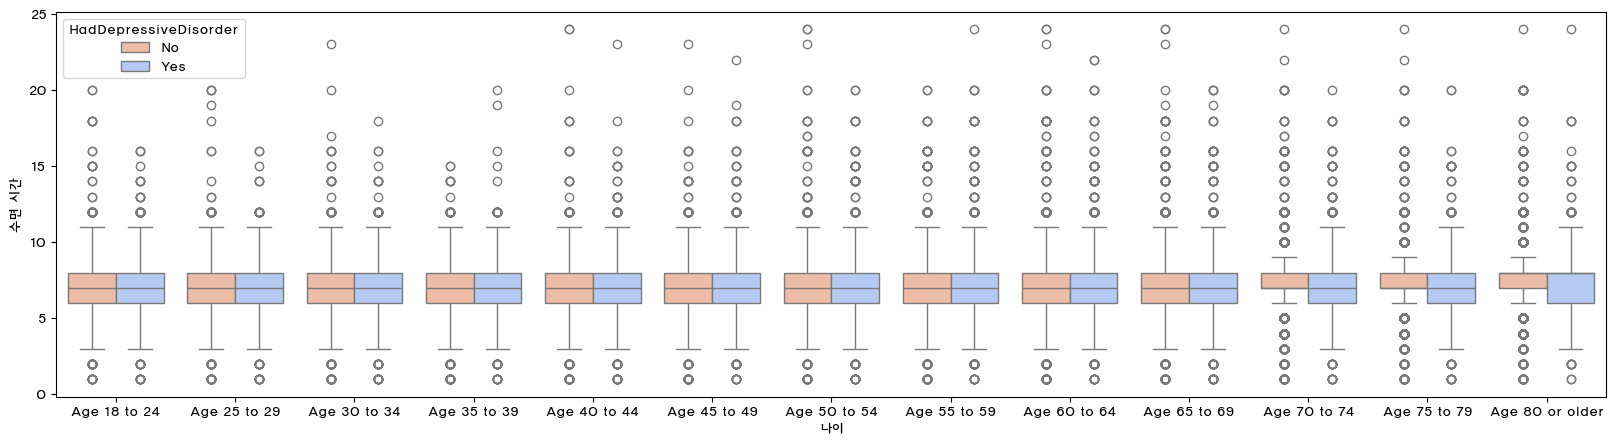

In [ ]:
# 연령/수면 시간에 따른 우울증 여부

plt.figure(figsize=(20,5))

sns.boxplot(
    data=df,
    x='AgeCategory',
    y='SleepHours',
    hue='HadDepressiveDisorder',
    palette='coolwarm_r',
    order=order,
).set_xlabel("나이")

plt.ylabel("수면 시간")

plt.show()

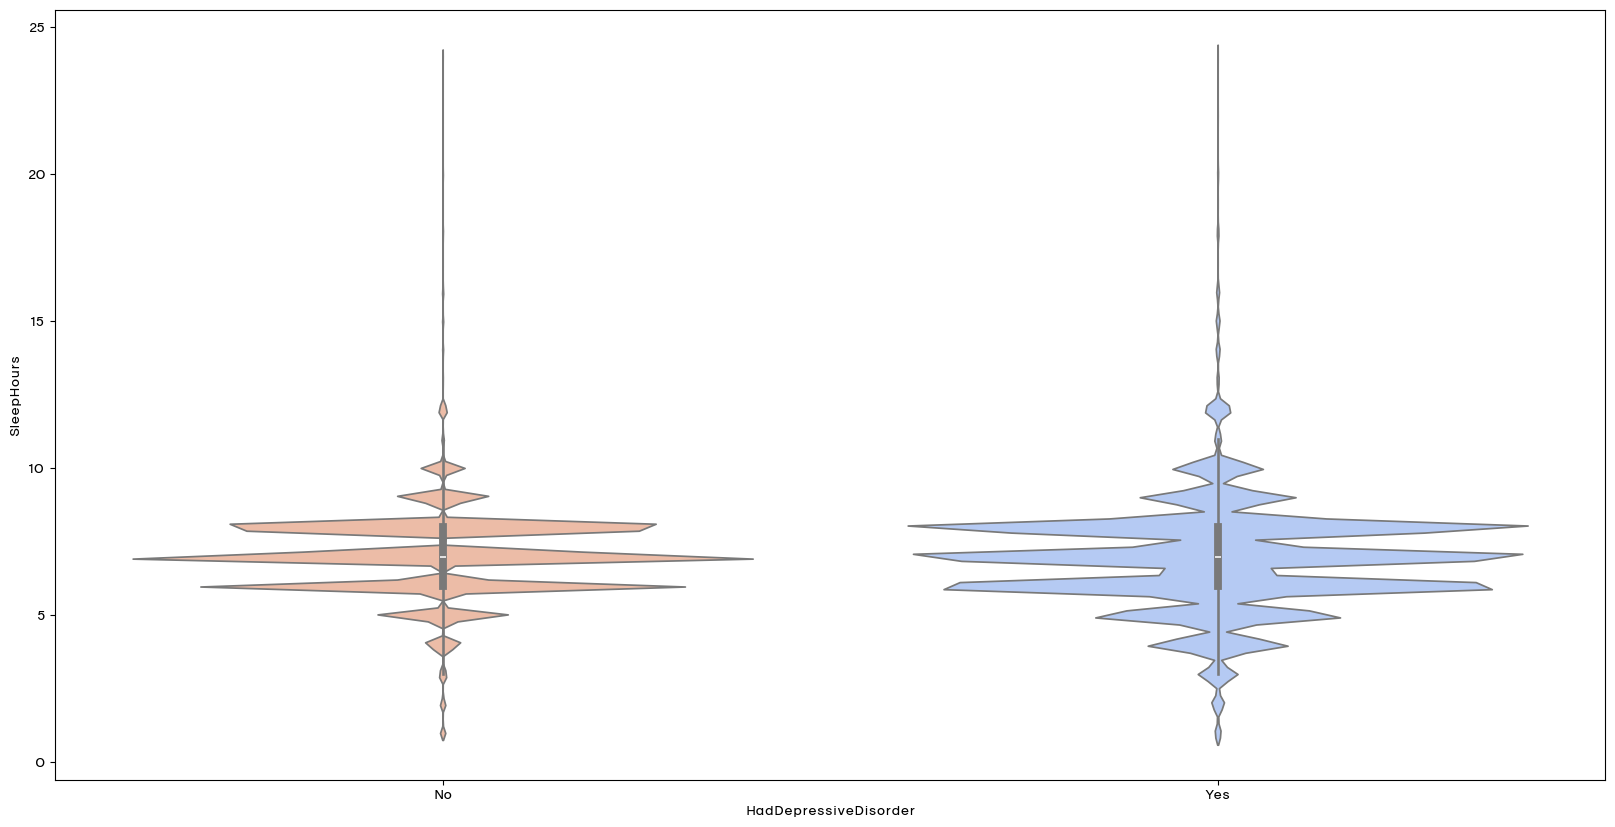

In [149]:
# 우울증과 수면시간의 관계
plt.figure(figsize=(20,10))
sns.violinplot(
    data=df, x='HadDepressiveDisorder', y='SleepHours', hue='HadDepressiveDisorder', palette='coolwarm_r')
plt.show()

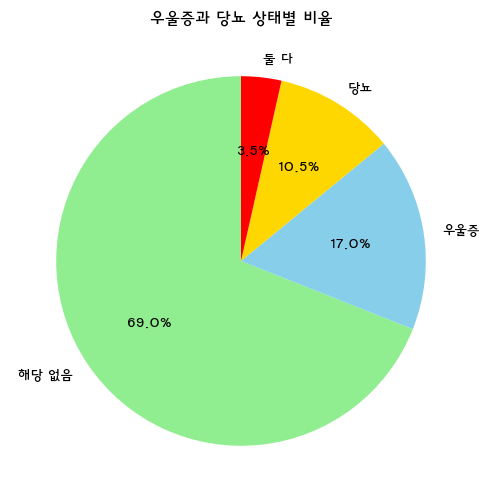

In [150]:
# 우울증, 당뇨 비율

conditions = [
    (df['HadDepressiveDisorder'] == 'No') & (df['HadDiabetes'] == 'No'),
    (df['HadDepressiveDisorder'] == 'Yes') & (df['HadDiabetes'] == 'No'),
    (df['HadDepressiveDisorder'] == 'No') & (df['HadDiabetes'] == 'Yes'),
    (df['HadDepressiveDisorder'] == 'Yes') & (df['HadDiabetes'] == 'Yes')
]
labels = ['해당 없음', '우울증', '당뇨', '둘 다']
counts = [df[i].shape[0] for i in conditions]


plt.figure(figsize=(6,6))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen', 'skyblue', 'gold', 'red']
)
plt.title('우울증과 당뇨 상태별 비율')
plt.show()

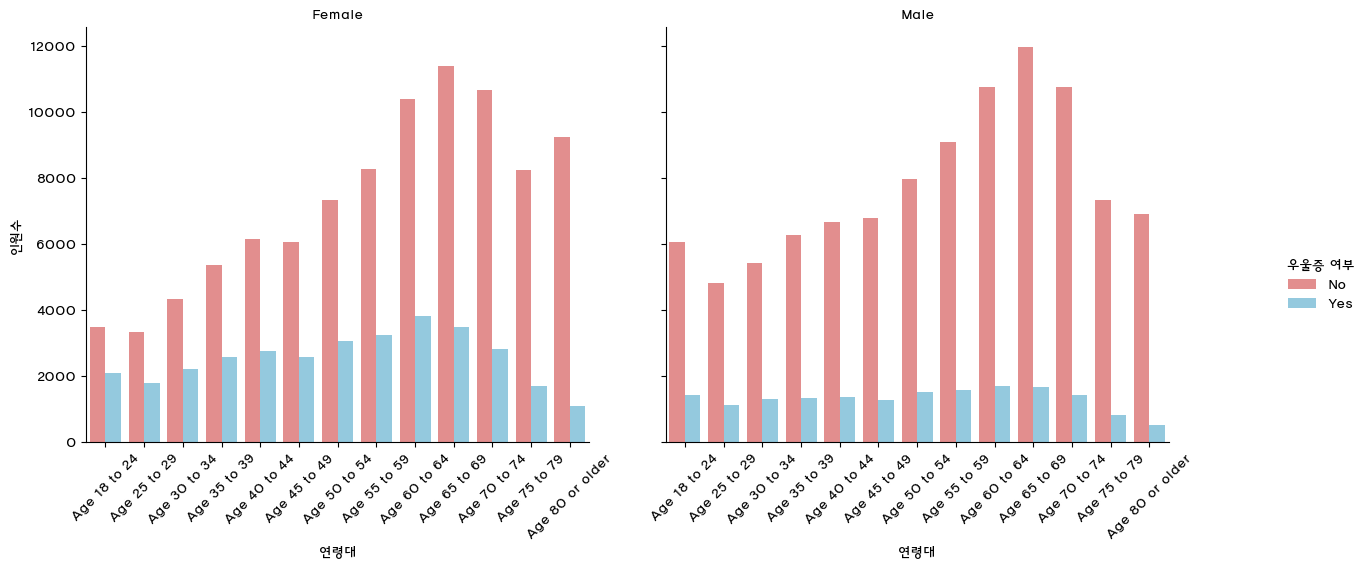

In [151]:
# 성별, 나이 별 우울증 
g = sns.catplot(data=df, x='AgeCategory', hue='HadDepressiveDisorder', col='Sex', kind='count', order=order,
    palette=['lightcoral','skyblue'], height=5, aspect=1.2)
g.set_xticklabels(rotation=45)
g.set_axis_labels("연령대", "인원수")
g.set_titles("{col_name}")
g._legend.set_title("우울증 여부")

plt.show()

Text(0.5, 0.98, '당뇨환자 BMI 밀도 ( + 음주, 흡연)')

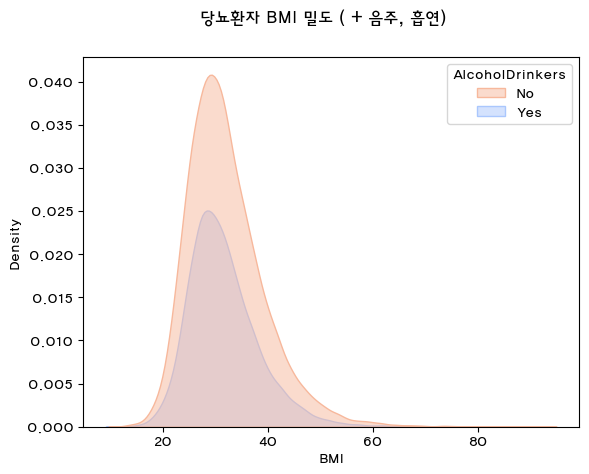

In [ ]:
sns.kdeplot(
    data=df[df['HadDiabetes']=='Yes'],
    x='BMI',
    hue='AlcoholDrinkers',
    fill=True,
    alpha=0.5,
    palette='coolwarm_r'
)
plt.suptitle('당뇨환자 BMI 밀도 ( + 음주, 흡연)')

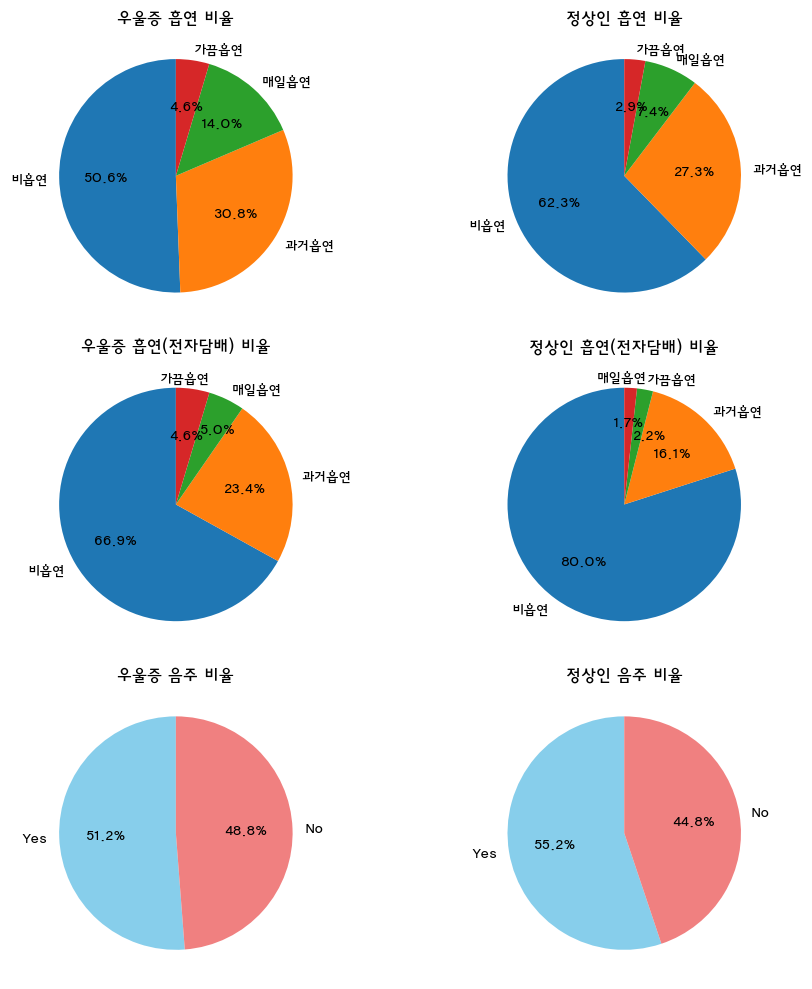

In [53]:
fig, ax = plt.subplots(3, 2, figsize=(10,10))

# 우울증 있음 그룹
smoke_yes = df[df['HadDepressiveDisorder'] == 'Yes']['SmokerStatus'].value_counts(normalize=True)
ax[0,0].pie(
    smoke_yes,
    labels=smoke_yes.index,
    autopct='%1.1f%%',
    startangle=90,
)
ax[0,0].set_title('우울증 흡연 비율')


# 우울증 없음 그룹
smoke_no = df[df['HadDepressiveDisorder'] == 'No']['SmokerStatus'].value_counts(normalize=True)
ax[0,1].pie(
    smoke_no,
    labels=smoke_no.index,
    autopct='%1.1f%%',
    startangle=90,
)
ax[0,1].set_title('정상인 흡연 비율')


# 전자담배 (우울증 있음)
ec_yes = df[df['HadDepressiveDisorder'] == 'Yes']['ECigaretteUsage'].value_counts(normalize=True)
_, texts, autotexts = ax[1,0].pie(
    ec_yes,
    labels=ec_yes.index,
    autopct='%1.1f%%',
    startangle=90,
    labeldistance=1.1
)
for t in texts:
    if t.get_text() == '가끔흡연':
        x, y = t.get_position()
        t.set_position((x - 0.3, y))
for t, at in zip(texts, autotexts):
    if t.get_text() == '매일흡연':
        x, y = at.get_position()
        at.set_position((x+0.1, y + 0.1))
ax[1,0].set_title('우울증 흡연(전자담배) 비율')


# 전자담배 (우울증 없음)
ec_no = df[df['HadDepressiveDisorder'] == 'No']['ECigaretteUsage'].value_counts(normalize=True)
_, texts, autotexts = ax[1,1].pie(
    ec_no,
    labels=ec_no.index,
    autopct='%1.1f%%',
    startangle=90,
)
for t in texts:
    if t.get_text() == '매일흡연':
        x, y = t.get_position()
        t.set_position((x - 0.3, y))
for t, at in zip(texts, autotexts):
    if t.get_text() == '매일흡연':
        x, y = at.get_position()
        at.set_position((x, y + 0.1))
    if t.get_text() == '가끔흡연':
        x, y = at.get_position()
        at.set_position((x + 0.1, y))
ax[1,1].set_title('정상인 흡연(전자담배) 비율')


# 음주 (우울증 있음)
drink_yes = df[df['HadDepressiveDisorder'] == 'Yes']['AlcoholDrinkers'].value_counts(normalize=True)
ax[2,0].pie(
    drink_yes,
    labels=drink_yes.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue','lightcoral',]
)
ax[2,0].set_title('우울증 음주 비율')


# 음주 (우울증 없음)
drink_no = df[df['HadDepressiveDisorder'] == 'No']['AlcoholDrinkers'].value_counts(normalize=True)
ax[2,1].pie(
    drink_no,
    labels=drink_no.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue','lightcoral',]
)
ax[2,1].set_title('정상인 음주 비율')


plt.tight_layout()
plt.show()

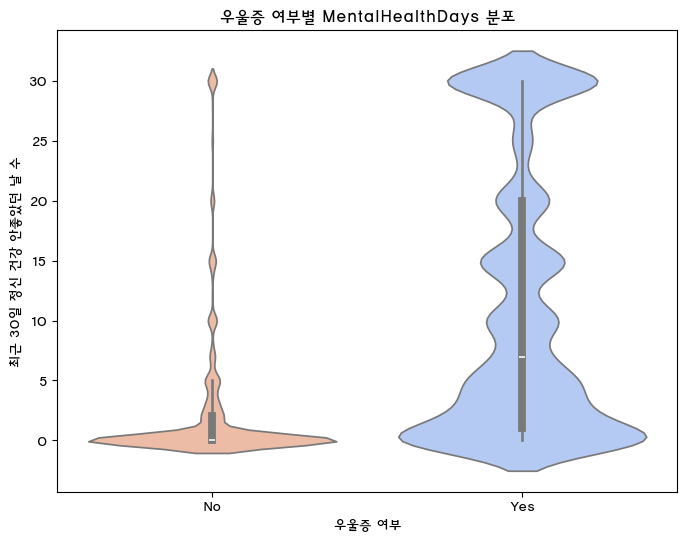

In [153]:
# 우울증이 있는사람과 없는사람 간의 정신건강 이상일 비교
 
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='HadDepressiveDisorder', y='MentalHealthDays', palette='coolwarm_r', legend=False, hue='HadDepressiveDisorder' )
plt.title('우울증 여부별 MentalHealthDays 분포')
plt.xlabel('우울증 여부')
plt.ylabel('최근 30일 정신 건강 안좋았던 날 수')
plt.show()


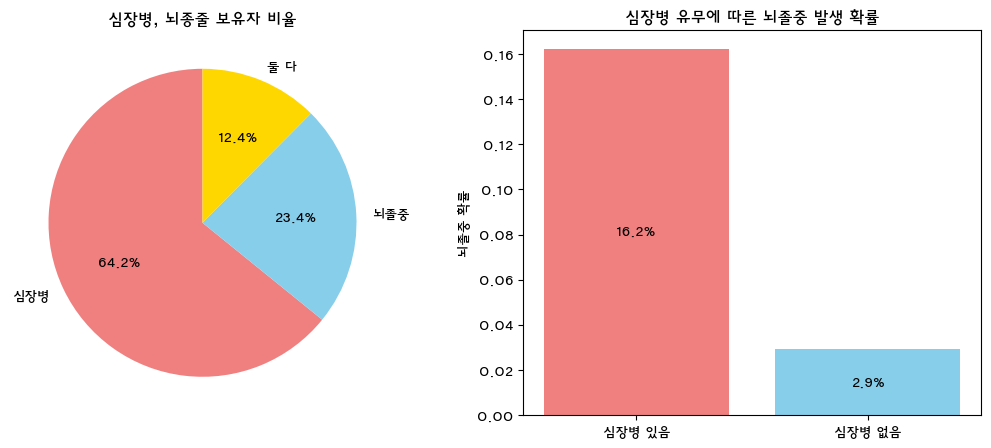

In [163]:

conditions = [
    (df['HeartDisease'] == 'Yes') & (df['HadStroke'] == 'No'),
    (df['HeartDisease'] == 'No') & (df['HadStroke'] == 'Yes'),
    (df['HeartDisease'] == 'Yes') & (df['HadStroke'] == 'Yes')
]
labels = ['심장병', '뇌졸중', '둘 다']
counts = [df[i].shape[0] for i in conditions]

fig, ax = plt.subplots(1, 2, figsize=(13,5))
ax[0].pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue', 'gold'])
ax[0].set_title('심장병, 뇌종줄 보유자 비율')

# 심장병이 있는 사람 중 뇌졸중 비율
hd_yes = df[df['HeartDisease']=='Yes']
stroke_given_hd_yes = (hd_yes['HadStroke']=='Yes').mean()

# 심장병이 없는 사람 중 뇌졸중 비율
hd_no = df[df['HeartDisease']=='No']
stroke_given_hd_no = (hd_no['HadStroke']=='Yes').mean()


ax[1].bar(['심장병 있음','심장병 없음'], [stroke_given_hd_yes, stroke_given_hd_no], color=['lightcoral','skyblue'])
ax[1].bar_label(ax[1].containers[0], labels=[f'{stroke_given_hd_yes:.1%}', f'{stroke_given_hd_no:.1%}'], label_type='center')
ax[1].set_ylabel('뇌졸중 확률')
ax[1].set_title('심장병 유무에 따른 뇌졸중 발생 확률')




plt.show()

In [ ]:
df['RaceEthnicityCategory'].unique()

array(['White only, Non-Hispanic', 'Black only, Non-Hispanic',
       'Other race only, Non-Hispanic', 'Multiracial, Non-Hispanic',
       'Hispanic'], dtype=object)

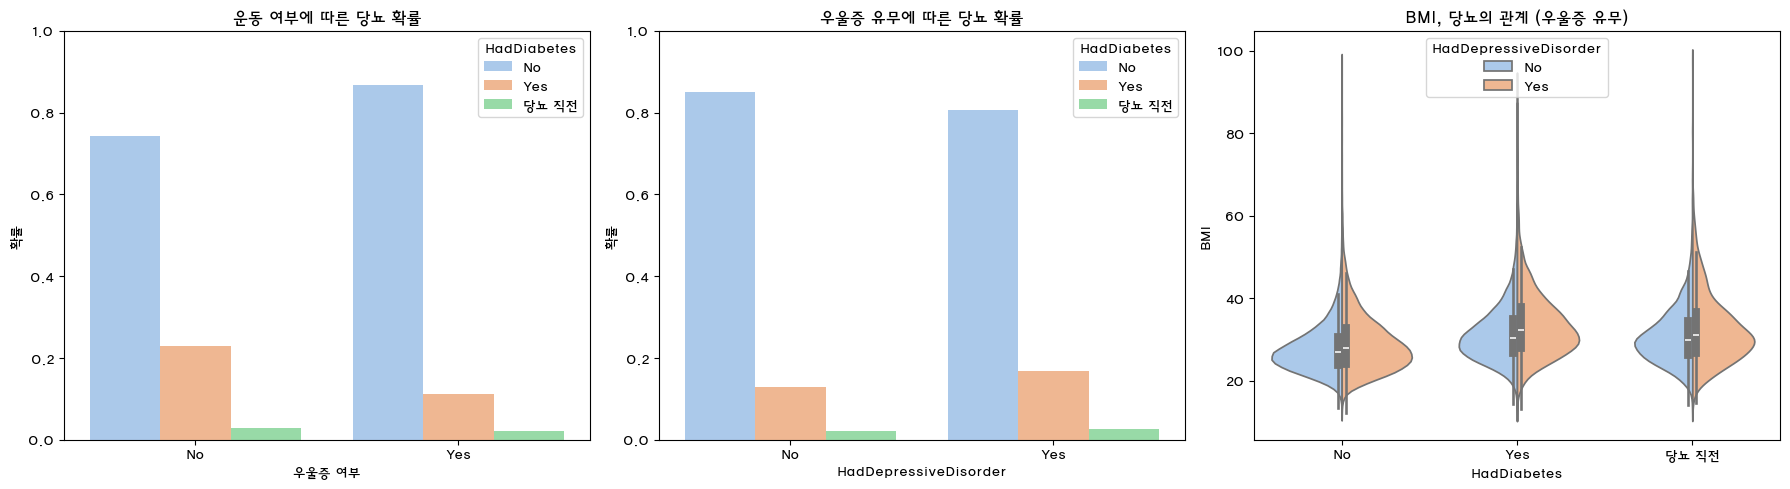

In [165]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

pa_diabetes = df.groupby('PhysicalActivities')['HadDiabetes'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot( data=pa_diabetes, x='PhysicalActivities', y='proportion', hue='HadDiabetes', palette='pastel', ax=axes[0])
axes[0].set_title('운동 여부에 따른 당뇨 확률')
axes[0].set_ylabel('확률')
axes[0].set_xlabel('운동 여부')
axes[0].set_ylim(0,1)

dep_diabetes = df.groupby('HadDepressiveDisorder')['HadDiabetes'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(data=dep_diabetes, x='HadDepressiveDisorder', y='proportion', hue='HadDiabetes', palette='pastel', ax=axes[1])
axes[1].set_title('우울증 유무에 따른 당뇨 확률')
axes[1].set_ylabel('확률')
axes[0].set_xlabel('우울증 여부')
axes[1].set_ylim(0,1)

sns.violinplot( data=df, x='HadDiabetes', y='BMI', hue='HadDepressiveDisorder', split=True, palette='pastel', ax=axes[2])
axes[2].set_title('BMI, 당뇨의 관계 (우울증 유무)')
axes[2].set_ylabel('BMI')

plt.tight_layout()
plt.show()


C:\Users\TJ\AppData\Local\Temp\ipykernel_11636\3918437275.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_grouped = df.groupby('BMI_bin')['HadDiabetes'].apply(lambda x: (x == 'Yes').mean())


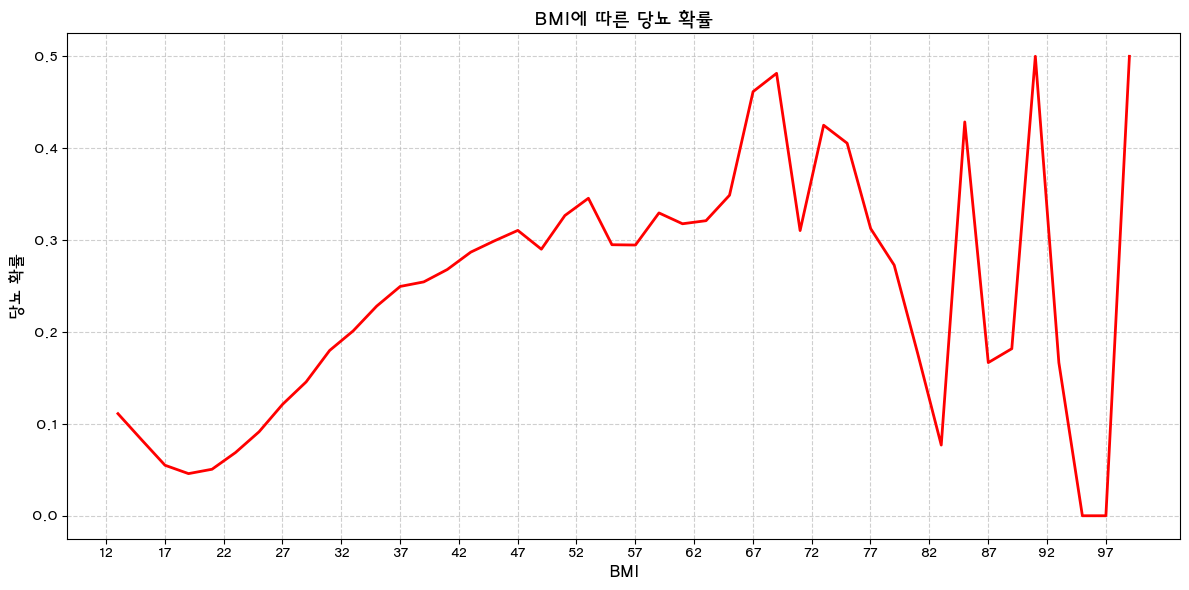

In [72]:
# BMI와 당뇨 여부 데이터 준비
bmi = df['BMI']
diabetes = (df['HadDiabetes'] == 'Yes').astype(int)

# BMI를 2단위로 binning
bins = np.arange(bmi.min(), bmi.max() + 2, 2)
df['BMI_bin'] = pd.cut(bmi, bins=bins)

# 각 구간별 당뇨 확률 계산
bmi_grouped = df.groupby('BMI_bin')['HadDiabetes'].apply(lambda x: (x == 'Yes').mean())

# 구간 중심값 계산
bin_centers = [interval.mid for interval in bmi_grouped.index.categories]

# 시각화
plt.figure(figsize=(12,6))
plt.plot(bin_centers, bmi_grouped.values, color='red', linewidth=2)

# 제목, 라벨
plt.title("BMI에 따른 당뇨 확률", fontsize=14)
plt.xlabel("BMI", fontsize=12)
plt.ylabel("당뇨 확률", fontsize=12)

# x축 5단위 간격으로
plt.xticks(np.arange(int(bmi.min()), int(bmi.max()) + 1, 5))

# 격자 추가 (가로, 세로 둘 다)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

C:\Users\TJ\AppData\Local\Temp\ipykernel_11636\587390147.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_grouped = df.groupby('BMI_bin')['HadDiabetes'].apply(lambda x: (x == 'Yes').sum())


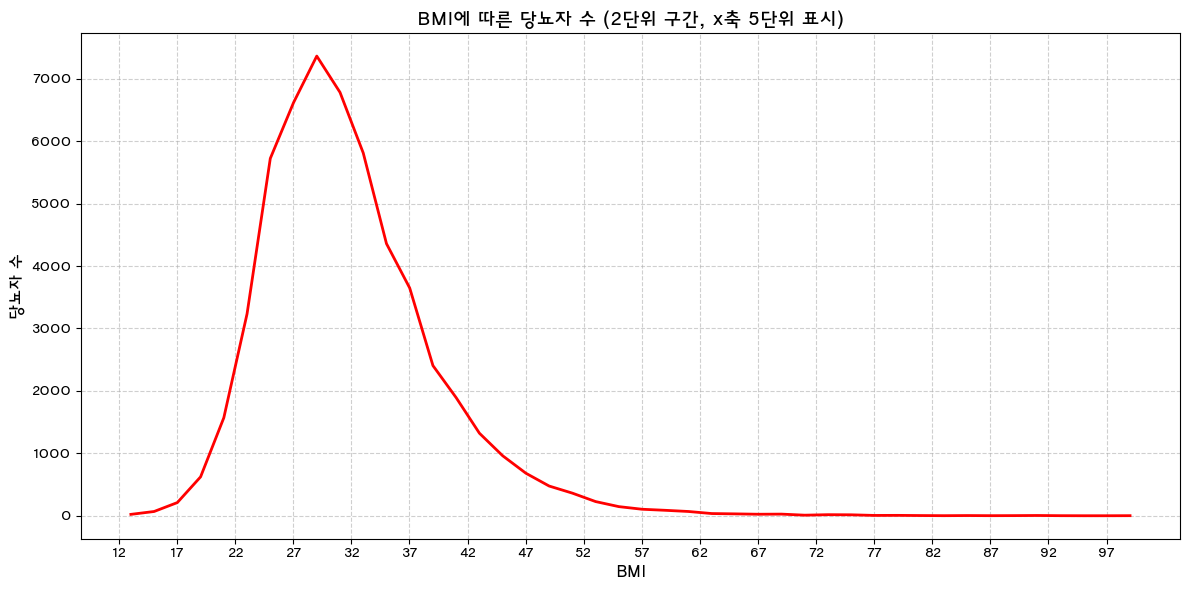

In [71]:

# BMI와 당뇨 여부 데이터
bmi = df['BMI']
bins = np.arange(bmi.min(), bmi.max() + 2, 2)
df['BMI_bin'] = pd.cut(bmi, bins=bins)

# 각 구간별 당뇨자 수(count)
bmi_grouped = df.groupby('BMI_bin')['HadDiabetes'].apply(lambda x: (x == 'Yes').sum())

# 구간 중심값 계산
bin_centers = [interval.mid for interval in bmi_grouped.index.categories]

# 시각화
plt.figure(figsize=(12,6))
plt.plot(bin_centers, bmi_grouped.values, color='red', linewidth=2)

# 제목, 라벨
plt.title("BMI에 따른 당뇨자 수 (2단위 구간, x축 5단위 표시)", fontsize=14)
plt.xlabel("BMI", fontsize=12)
plt.ylabel("당뇨자 수", fontsize=12)

# x축 5단위 간격으로
plt.xticks(np.arange(int(bmi.min()), int(bmi.max()) + 1, 5))

# 격자 추가
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


C:\Users\TJ\AppData\Local\Temp\ipykernel_12472\662216096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI_bin'] = pd.cut(df['BMI'], bins=bins)
C:\Users\TJ\AppData\Local\Temp\ipykernel_12472\662216096.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diabetes_yes = df.groupby('BMI_bin')['HadDiabetes'].apply(lambda x: (x == 'Yes').sum())
C:\Users\TJ\AppData\Local\Temp\ipykernel_12472\662216096.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain cu

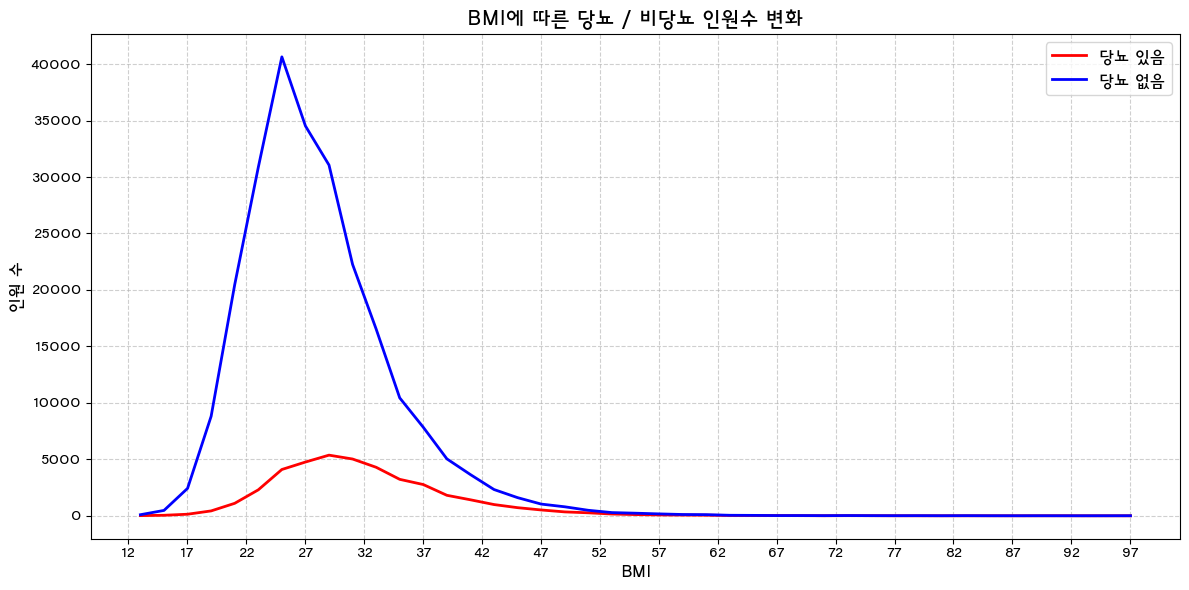

In [33]:
# BMI 구간 생성 (2 단위 간격)
bins = np.arange(df['BMI'].min(), df['BMI'].max() + 2, 2)
df['BMI_bin'] = pd.cut(df['BMI'], bins=bins)

# 구간별 당뇨자 수 / 비당뇨자 수
diabetes_yes = df.groupby('BMI_bin')['HadDiabetes'].apply(lambda x: (x == 'Yes').sum())
diabetes_no = df.groupby('BMI_bin')['HadDiabetes'].apply(lambda x: (x == 'No').sum())

# 구간 중심값 계산
bin_centers = [interval.mid for interval in diabetes_yes.index.categories]

# 시각화
plt.figure(figsize=(12,6))
plt.plot(bin_centers, diabetes_yes.values, color='red', linewidth=2, label='당뇨 있음')
plt.plot(bin_centers, diabetes_no.values, color='blue', linewidth=2, label='당뇨 없음')

# 제목, 라벨
plt.title("BMI에 따른 당뇨 / 비당뇨 인원수 변화", fontsize=15)
plt.xlabel("BMI", fontsize=12)
plt.ylabel("인원 수", fontsize=12)

# x축 5단위 간격 눈금
plt.xticks(np.arange(int(df['BMI'].min()), int(df['BMI'].max()) + 1, 5))

# 격자 및 범례
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

In [171]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# 각 컬럼별로 자동 변환
df_encoded = df.copy()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':  # 문자열형만 변환
        df_encoded[col] = encoder.fit_transform(df_encoded[col].astype(str))


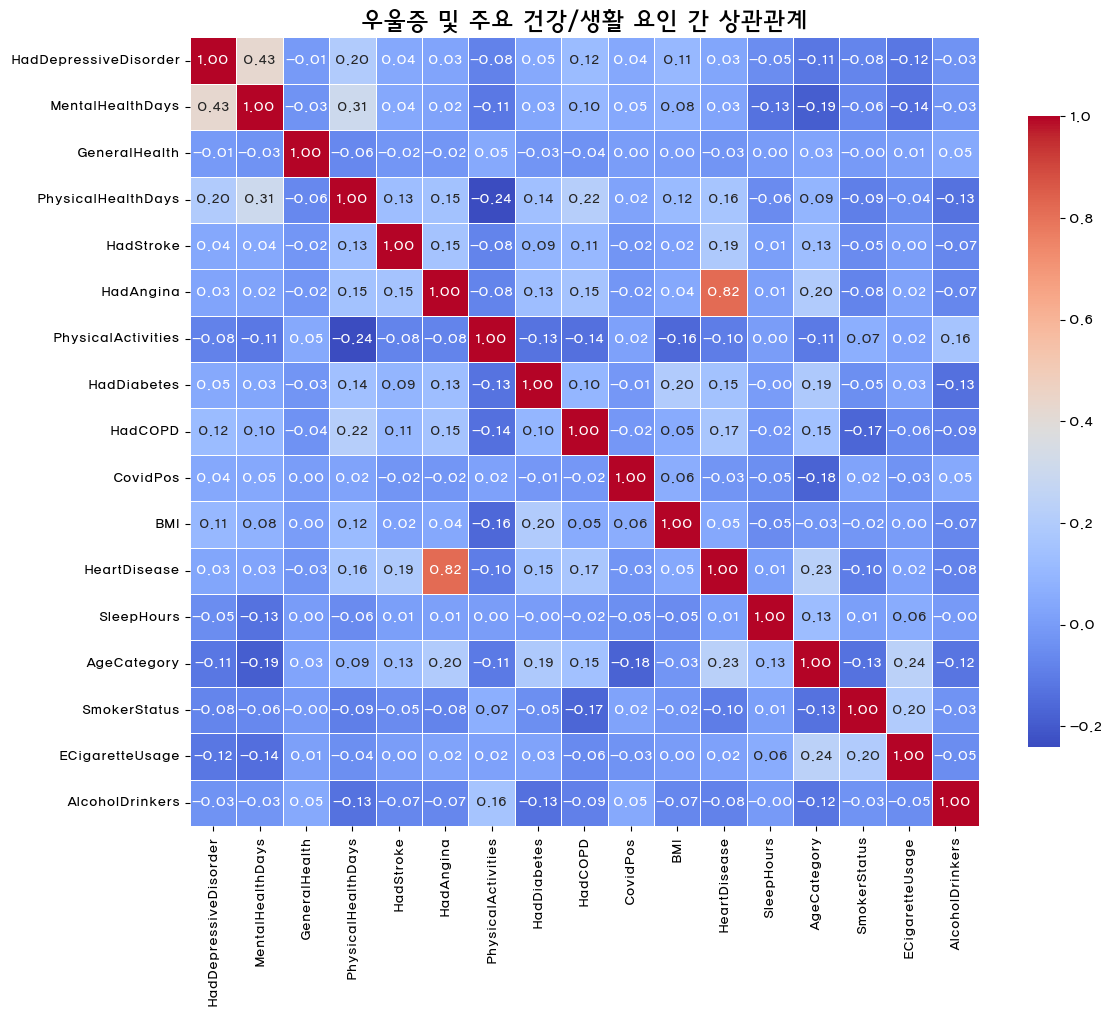

In [175]:
cols = [
    'HadDepressiveDisorder', 'MentalHealthDays', 'GeneralHealth', 'PhysicalHealthDays',
    'HadStroke', 'HadAngina', 'PhysicalActivities', 'HadDiabetes',
    'HadCOPD', 'CovidPos', 'BMI', 'HeartDisease',
    'SleepHours', 'AgeCategory', 'SmokerStatus', 'ECigaretteUsage', 'AlcoholDrinkers'
]

# 필요한 컬럼만 추출
subset_df = df[cols].copy()

# Label Encoding (문자형 -> 숫자형)
encoder = LabelEncoder()
for col in subset_df.columns:
    if subset_df[col].dtype == 'object':
        subset_df[col] = encoder.fit_transform(subset_df[col].astype(str))

# 상관관계 행렬 계산
corr_mat = subset_df.corr(numeric_only=True)

# 히트맵 시각화
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_mat,
    cmap='coolwarm',
    annot=True,
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'shrink': 0.8},
    square=True
)
plt.title('우울증 및 주요 건강/생활 요인 간 상관관계', fontsize=18)
plt.tight_layout()
plt.show()


## 9. 최종요약/인사이트 도출

- 남성보다 여성이 더 우울증에 걸릴 확률이 높다
- 갱년기 여성들이 가장 우울증에 잘 걸린다.
- 우울증에 걸린 사람들이 아닌 사람들 보다 흡연 및 전자담배 흡연을 할 확률이 높다.
- 우울증에 걸린 사람들이 아닌 사람들 보다 수면시간이 더 길다.
- 우울증에 걸린 사람들이 아닌 사람들 보다 정신건강이 빈번하게 나빠진다.
- 시각장애, 보행 불가능, 일상생활의 어려움에 따라 우울증에 걸릴 확률이 크게 증가한다.

